In [1]:
import os
import cv2
from PIL import Image
import pytesseract as pt
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
import re

In [2]:
pt.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
os.listdir()

['.ipynb_checkpoints', 'extracting_information_from_krs.ipynb', 'my_krs.jpg']

In [4]:
data_path = 'my_krs.jpg'

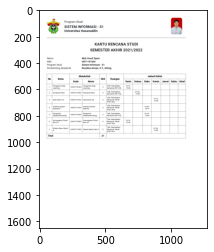

In [5]:
img= Image.open(data_path)
plt.imshow(img)
plt.show()

In [6]:
text = pt.image_to_string(data_path)

print(text)

Program Studi

SISTEM INFORMASI - S1
Universitas Hasanuddin

eA
Nama Muh. Yusuf Syam
NIM HO71191044
Program Studi Sistem Informasi - $1
Pembimbing Akademik Rozalina Amran, S.T., M.Eng.
Matakuliah Jadwal Kuliah
No Kelas SKS Ruangan
Kode Nama Senin | Selasa | Rabu | Kal Jumat | Sabtu | Ahad
Pengantar Deep Pengantar Deep TMI Perkuliahan | 13:10-
* | Learning 18H07132408 | | earning 3 | Bersama (PB 132) | 15:40
ML Perkuliahan 07:30-
2 | Kompresi Data 1807131503 | Kompresi Data 3 | Became (e132) Toon.
TML Perkuliahan 4010-
3. | Data Sains oT 1807132703 | Data Sains lot 3 | Bersama Teknik eo
(PBT 302)
TMI Perkuliahan
4 | Analisis sistem | grovrar4os | Analisis Sistem a | Bersama Teknik 1540
P per (PBT 303)
Pengantar Pengantar ML Perkuliahan 10:10-
5 | Datawarehousing | 107192803 | patawarehousing 3 | Bersama (PB 125) 1240
ML Perkuliahan
6 | Konvergensi Cloud | sero71aze0a | KonvergensiCloud | 5 | percama Teknik Lie
(PBT 303)
TML Perkuliahan
7 | Sistem Basis Data? | + s07121908| sistem Basis 

In [7]:
text_list= text.split('\n')
text_list

['Program Studi',
 '',
 'SISTEM INFORMASI - S1',
 'Universitas Hasanuddin',
 '',
 'eA',
 'Nama Muh. Yusuf Syam',
 'NIM HO71191044',
 'Program Studi Sistem Informasi - $1',
 'Pembimbing Akademik Rozalina Amran, S.T., M.Eng.',
 'Matakuliah Jadwal Kuliah',
 'No Kelas SKS Ruangan',
 'Kode Nama Senin | Selasa | Rabu | Kal Jumat | Sabtu | Ahad',
 'Pengantar Deep Pengantar Deep TMI Perkuliahan | 13:10-',
 '* | Learning 18H07132408 | | earning 3 | Bersama (PB 132) | 15:40',
 'ML Perkuliahan 07:30-',
 '2 | Kompresi Data 1807131503 | Kompresi Data 3 | Became (e132) Toon.',
 'TML Perkuliahan 4010-',
 '3. | Data Sains oT 1807132703 | Data Sains lot 3 | Bersama Teknik eo',
 '(PBT 302)',
 'TMI Perkuliahan',
 '4 | Analisis sistem | grovrar4os | Analisis Sistem a | Bersama Teknik 1540',
 'P per (PBT 303)',
 'Pengantar Pengantar ML Perkuliahan 10:10-',
 '5 | Datawarehousing | 107192803 | patawarehousing 3 | Bersama (PB 125) 1240',
 'ML Perkuliahan',
 '6 | Konvergensi Cloud | sero71aze0a | KonvergensiCl

In [8]:
name= text_list[6]
major= text_list[8].split('-')[0]

In [9]:
print(f'{name}\n{major}')

Nama Muh. Yusuf Syam
Program Studi Sistem Informasi 
